## Setting up our model
In this polymerization model, we will start with just monomers and initiator.
Monomers will, in the presence of an initiator, bond to form a chain. The polymer will grow until all the monomer is consumed. 
First, let's set up our initial conditions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
M0 = 1e3  # Initial monomer concentration (mol/L)
I0 = 1e-4  # Initial initiator concentration (mol/L)
T_array = np.array([300, 320, 340, 360])  # Temperature of interest (K)

## Calculating the rate constant
Since we are interested in the effects of temperature on the reaction rate, we will be using the Arrhenius equation to determine the rate constant. The Arrhenius equation states
$$ k = Ae^{-E_a / RT} $$
Use this to calculate our rate constants.

In [2]:
# Constants
A = 1e6  # Pre-exponential factor (L/mol·s)
Ea = 75e3  # Activation energy (J/mol)
R = 8.314  # Gas constant (J/mol·K)

# Arrhenius equation for rate constant
k = A * np.exp(-Ea / (R * T_array))

## What is the impact of temperature on the initial rate of polymerization?
The rate of the reaction will change over time as the concentration of reactants and products change. However, just looking at the initial reaction rates can tell us about the general influence of temperature. 

To get the reaction rate from the reaction constant, we use the relation below:
$$R_p = k [M] \sqrt{[I]}$$

(For the derivation of this relationship, see
[here](chem.libretexts.org/Bookshelves/Organic_Chemistry/Polymer_Chemistry_(Schaller)/03%3A_Kinetics_and_Thermodynamics_of_Polymerization/3.03%3A_Kinetics_of_Chain_Polymerization))

In [ ]:
# Initial polymerization rate
Rp_array = k * M0 * np.sqrt(I0)

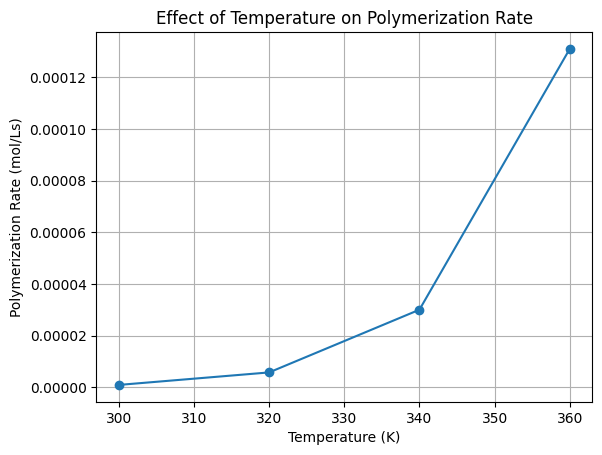

In [3]:
# Plot the initial polymerization rates vs. temperature
plt.plot(T_array, Rp_array, marker='o')
plt.xlabel("Temperature (K)")
plt.ylabel("Polymerization Rate (mol/Ls)")
plt.title("Effect of Temperature on Polymerization Rate")
plt.grid(True)
plt.show()

## Set up simulation
Now, set up the simulator. We will be starting with no polymer (chain length of zero). The time steps and dt are parameters that encode how long of a reaction we will simulate, and how frequently we will sample.

In [ ]:
# Polymerization parameters
time_steps = 1000
dt = 0.001  # Time step (s)
polymer = 0
chain_length = 0

## Simulate
This is the step where we actually simulate our polymerization reaction. 

For every time point, we calculate our reaction rate (as we did in part 3). This must be updated every iteration since the concentration of monomer is always changing.

Then, we use the reaciton rate to update the concentration of our monomer, polymer, and initiator. 

Finally, we calculate the chain length of each polymer. Assuming that our polymers are a simple chain, our averae chain length is the concentration of polymer divided by the concentration of the monomer, normalized by some scaling factor. 

In [2]:
def sim_poly(k, monomer, polymer, initiator, dt):
    # Simulate polymerization

    molecular_weights = []
    
    for t in range(time_steps):
        R_p = k * monomer * np.sqrt(initiator)  # Rate of polymerization
        
        # Update concentrations based on rates
        monomer -= R_p * dt
        initiator -= R_p * dt / 2  # Assuming initiator is consumed at half the rate
        polymer += R_p * dt
        
        # Molecular weight distribution calculation
        if polymer > 0:
            chain_length = polymer / monomer
            molecular_weights.append(chain_length * 100)  # Example scaling
        
        if monomer <= 0:  # Stop when all monomers are consumed
            break
    
    return molecular_weights

## How does average molecular weight change over time, at different temperatures?
Now, plug in our different rate constants (reflective of our different temperatures) into our simulator. How does the average weight change over time and between different temperatures?

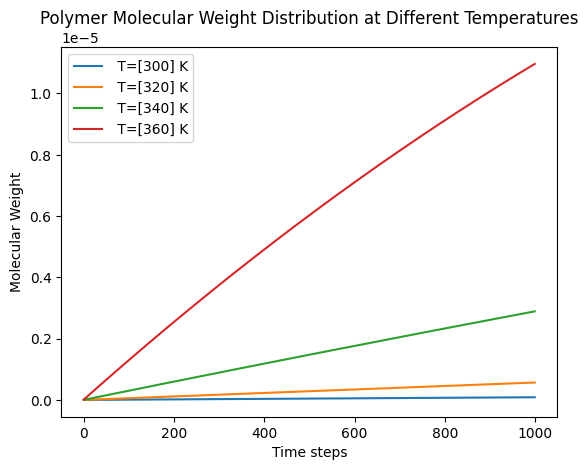

In [3]:
for k_now in k:
    
    # Run the simulation for each rate constant value (each corresponds to a different temperature)
    molecular_weights = sim_poly(k_now, M0, polymer, I0, dt)
    
    # Plot Molecular Weight vs. Time
    plt.plot(molecular_weights, label=f' T={T_array[np.where(k == k_now)]} K')

# Plot results
plt.xlabel('Time steps')
plt.ylabel('Molecular Weight')
plt.title('Polymer Molecular Weight Distribution at Different Temperatures')
plt.legend()
plt.show()

In [ ]:
## How does the polydispersity index change over time, at different temperatures?

In [ ]:
for k_now in k:
    
    molecular_weights = sim_poly(k_now, M0, polymer, I0, dt)
    
    # Plot Molecular Weight vs. Time
    plt.plot(PDI, label=f' T={T_array[np.where(k == k_now)]} K')

# Plot results
plt.xlabel('Time steps')
plt.ylabel('Polydispersity index')
plt.title('Polydispersity vs Time for Different Temperatures')
plt.legend()
plt.show()

In [5]:
!jupyter nbconvert --to html PolymerizationSimulatorClean.ipynb

[NbConvertApp] Converting notebook PolymerizationSimulatorClean.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 379241 bytes to PolymerizationSimulatorClean.html
